# 1: Analyse glacier model differences 

> discussed with Regine: plot the difference period - ref_period for each glacier model -> filter out downscaling difference 
	- look at differences between time series to reduce the downscaling influence  (as downscaling is different for every glacier model)
    
    
todo:
- what is the question here?
- maybe: Do the volume differences between the experiments coincide more than the "absolute volume changes"? 

or more a question that is interesting for the society:

- **How much more glacier ice can we save when 

In [1]:
DATE = 'MAY16' #'apr04'
# download it here https://cluster.klima.uni-bremen.de/~lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc
# and change the path to your local path
path_merged_runs_scaled = f'/home/www/lschuster/glacierMIP3_analysis/glacierMIP3_{DATE}_models_all_rgi_regions_sum_scaled.nc'

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from help_func import pal_models, model_order, d_reg_num_name
hue_order = model_order
ds_reg_models = xr.open_dataset(path_merged_runs_scaled)

In [3]:
dict_model_color = {}
for c,m in zip(pal_models, model_order):
    dict_model_color[m] = c

select a test rgi_reg, period_scenar

In [13]:
gcm = 'mri-esm2-0' #'gfdl-esm4'

In [16]:
rgi_reg='11'
period_scenario = '2061-2080_ssp126'
ref_period_scenario = '1995-2014_hist'

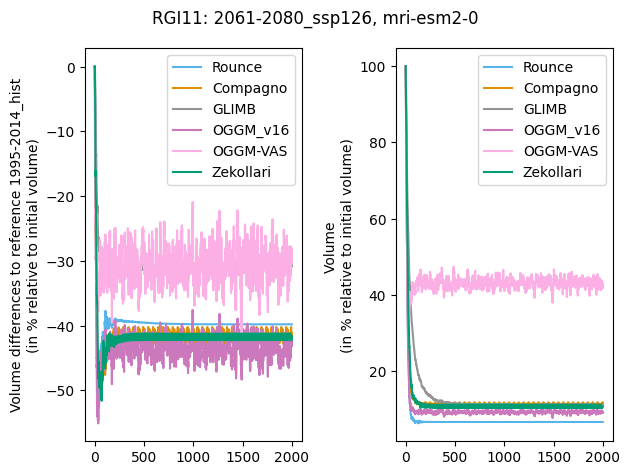

In [17]:
ds_reg_model_sel = ds_reg_models.sel(rgi_reg=rgi_reg).sel(period_scenario=period_scenario).volume_m3 - ds_reg_models.sel(rgi_reg=rgi_reg).sel(period_scenario=ref_period_scenario).volume_m3
ds_reg_model_sel_gcm = ds_reg_model_sel.sel(simulation_year=slice(0,1999)).dropna(dim='model_author')#.isel(gcm=0)
init_vol = ds_reg_models.sel(rgi_reg=rgi_reg).isel(simulation_year=0).mean().volume_m3
#for gcm in ds_reg_model_sel_gcm.gcm.values:
plt.suptitle(f'RGI{rgi_reg}: {period_scenario}, {gcm}')
plt.subplot(121)
for m in ds_reg_model_sel_gcm.model_author.values:
    plt.plot(ds_reg_model_sel_gcm.simulation_year,
             100*ds_reg_model_sel_gcm.sel(model_author=m).sel(gcm=gcm)/init_vol,
             color=dict_model_color[m], label=m)
plt.ylabel(f'Volume differences to reference {ref_period_scenario}\n(in % relative to initial volume)')
plt.legend()

plt.subplot(122)
ds_reg_model_abs = ds_reg_models.sel(rgi_reg=rgi_reg).sel(period_scenario=period_scenario).volume_m3 #- ds_reg_models.sel(rgi_reg=rgi_reg).sel(period_scenario=ref_period_scenario).volume_m3
ds_reg_model_abs_gcm = ds_reg_model_abs.sel(simulation_year=slice(0,1999)).dropna(dim='model_author')#.isel(gcm=0)
init_vol = ds_reg_models.sel(rgi_reg=rgi_reg).isel(simulation_year=0).mean().volume_m3

for m in ds_reg_model_abs_gcm.model_author.values:
    plt.plot(ds_reg_model_abs_gcm.simulation_year,
             100*ds_reg_model_abs_gcm.sel(model_author=m).sel(gcm=gcm)/init_vol,
             color=dict_model_color[m], label=m)
plt.ylabel(f'Volume \n(in % relative to initial volume)')
plt.tight_layout()
plt.legend()

In [26]:
rgi_reg='15'
period_scenario = '2061-2080_ssp370'
ref_period_scenario = '1995-2014_hist'

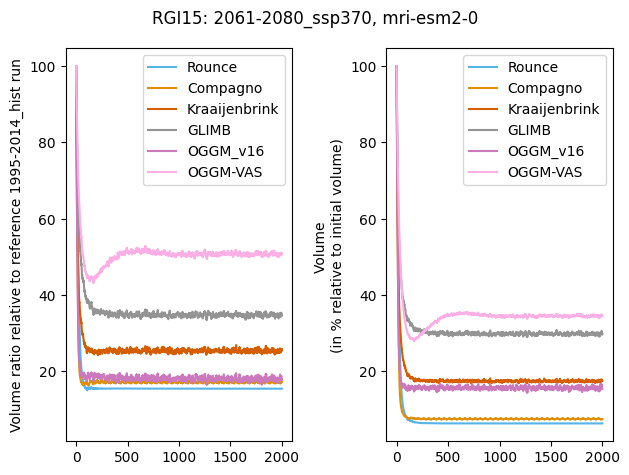

In [27]:
ds_reg_model_sel = 100*ds_reg_models.sel(rgi_reg=rgi_reg).sel(period_scenario=period_scenario).volume_m3/ds_reg_models.sel(rgi_reg=rgi_reg).sel(period_scenario=ref_period_scenario).volume_m3
ds_reg_model_sel_gcm = ds_reg_model_sel.sel(simulation_year=slice(0,1999)).dropna(dim='model_author')#.isel(gcm=0)
init_vol = ds_reg_models.sel(rgi_reg=rgi_reg).isel(simulation_year=0).mean().volume_m3
#for gcm in ds_reg_model_sel_gcm.gcm.values:
plt.suptitle(f'RGI{rgi_reg}: {period_scenario}, {gcm}')
plt.subplot(121)
for m in ds_reg_model_sel_gcm.model_author.values:
    plt.plot(ds_reg_model_sel_gcm.simulation_year,
             ds_reg_model_sel_gcm.sel(model_author=m).sel(gcm=gcm),
             color=dict_model_color[m], label=m)
plt.ylabel(f'Volume ratio relative to reference {ref_period_scenario} run')
plt.legend()
ax=plt.gca()
plt.subplot(122, sharey=ax)
ds_reg_model_abs = ds_reg_models.sel(rgi_reg=rgi_reg).sel(period_scenario=period_scenario).volume_m3 #- ds_reg_models.sel(rgi_reg=rgi_reg).sel(period_scenario=ref_period_scenario).volume_m3
ds_reg_model_abs_gcm = ds_reg_model_abs.sel(simulation_year=slice(0,1999)).dropna(dim='model_author')#.isel(gcm=0)
init_vol = ds_reg_models.sel(rgi_reg=rgi_reg).isel(simulation_year=0).mean().volume_m3

for m in ds_reg_model_abs_gcm.model_author.values:
    plt.plot(ds_reg_model_abs_gcm.simulation_year,
             100*ds_reg_model_abs_gcm.sel(model_author=m).sel(gcm=gcm)/init_vol,
             color=dict_model_color[m], label=m)
plt.ylabel(f'Volume \n(in % relative to initial volume)')
plt.tight_layout()
plt.legend()

In [38]:
xr.DataArray.isel?

Signature:
xr.DataArray.isel(
    self,
    indexers: 'Mapping[Any, Any]' = None,
    drop: 'bool' = False,
    missing_dims: 'str' = 'raise',
    **indexers_kwargs: 'Any',
) -> 'DataArray'
Docstring:
Return a new DataArray whose data is given by integer indexing
along the specified dimension(s).

Parameters
----------
indexers : dict, optional
    A dict with keys matching dimensions and values given
    by integers, slice objects or arrays.
    indexer can be a integer, slice, array-like or DataArray.
    If DataArrays are passed as indexers, xarray-style indexing will be
    carried out. See :ref:`indexing` for the details.
    One of indexers or indexers_kwargs must be provided.
drop : bool, optional
    If ``drop=True``, drop coordinates variables indexed by integers
    instead of making them scalar.
missing_dims : {"raise", "warn", "ignore"}, default: "raise"
    What to do if dimensions that should be selected from are not present in the
    DataArray:
    - "raise": raise an e

<AxesSubplot:>

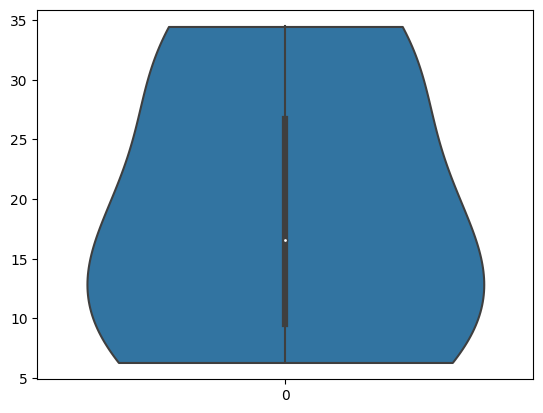

In [50]:
sns.violinplot((100*ds_reg_model_abs_gcm.sel(gcm=gcm)/init_vol).isel(simulation_year=np.arange(-30,0,1)).mean(dim='simulation_year').values, cut=0)

In [45]:
q25,q75 = (100*ds_reg_model_abs_gcm.sel(gcm=gcm)/init_vol).isel(simulation_year=np.arange(-30,0,1)).mean(dim='simulation_year').quantile([0.25,0.75])
iqr = q25,q75

<xarray.DataArray 'volume_m3' (quantile: 2)>
array([ 9.51744556, 26.72478914])
Coordinates:
  * quantile  (quantile) float64 0.25 0.75

In [53]:
rgi_reg='15'
period_scenario = '2061-2080_ssp585'
ref_period_scenario = '1995-2014_hist'

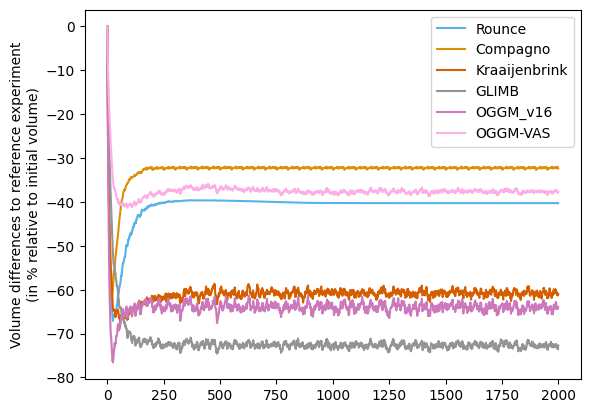

In [54]:
ds_reg_model_sel = ds_reg_models.sel(rgi_reg=rgi_reg).sel(period_scenario=period_scenario).volume_m3 - ds_reg_models.sel(rgi_reg=rgi_reg).sel(period_scenario=ref_period_scenario).volume_m3
ds_reg_model_sel_gcm = ds_reg_model_sel.sel(simulation_year=slice(0,1999)).dropna(dim='model_author')#.isel(gcm=0)
init_vol = ds_reg_models.sel(rgi_reg=rgi_reg).isel(simulation_year=0).mean().volume_m3
#for gcm in ds_reg_model_sel_gcm.gcm.values:
for m in ds_reg_model_sel_gcm.model_author.values:
    plt.plot(ds_reg_model_sel_gcm.simulation_year,
             100*ds_reg_model_sel_gcm.sel(model_author=m).sel(gcm=gcm)/init_vol,
             color=dict_model_color[m], label=m)
plt.ylabel(f'Volume differences to reference experiment\n(in % relative to initial volume)')
plt.legend()